In [7]:
import numpy as np
from keras.models import load_model
from keras.preprocessing import image
import cv2
from matplotlib import pyplot as plt
import os, os.path
import sys

np.random.seed(5)

In [2]:
model = load_model('./model2.h5')

In [3]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [4]:
frontFaceCascade = cv2.CascadeClassifier('frontFace_default.xml')
profileFaceCascade = cv2.CascadeClassifier('profileFace.xml')

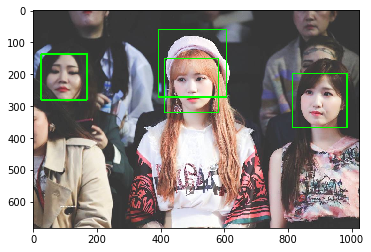

./predictImage/chaewon (1).jpg : 최예나
------------------------------------------------------------


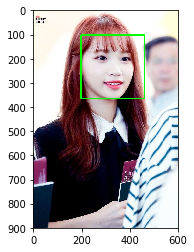

./predictImage/chaewon (10).jpg : 김채원
------------------------------------------------------------


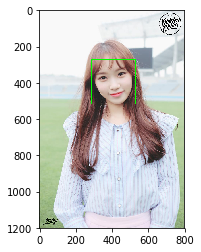

./predictImage/chaewon (11).jpg : 김채원
------------------------------------------------------------


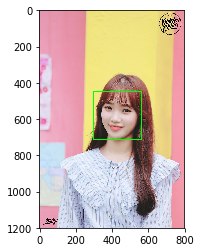

./predictImage/chaewon (12).jpg : 김채원
------------------------------------------------------------


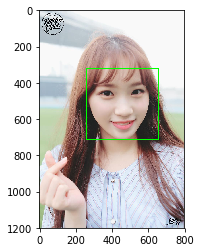

./predictImage/chaewon (13).jpg : 김채원
------------------------------------------------------------


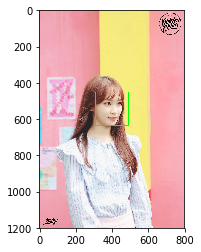

./predictImage/chaewon (14).jpg : 김채원
------------------------------------------------------------


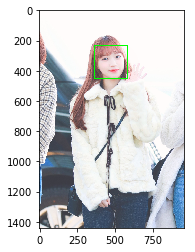

./predictImage/chaewon (15).jpg : 김채원
------------------------------------------------------------


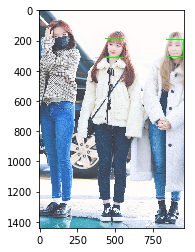

./predictImage/chaewon (16).jpg : 김채원
------------------------------------------------------------


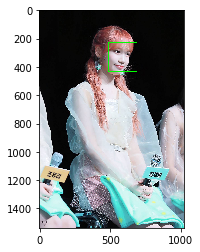

./predictImage/chaewon (17).jpg : 김채원
------------------------------------------------------------


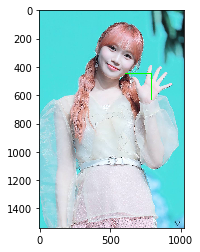

./predictImage/chaewon (18).jpg : 최예나
------------------------------------------------------------


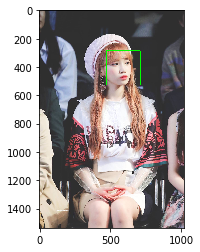

./predictImage/chaewon (19).jpg : 김채원
------------------------------------------------------------
./predictImage/chaewon (2).jpg : Fail to find face
------------------------------------------------------------


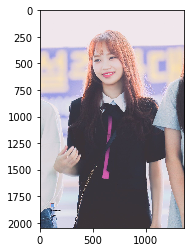

./predictImage/chaewon (20).jpg : 김채원
------------------------------------------------------------
./predictImage/chaewon (3).jpg : Fail to find face
------------------------------------------------------------


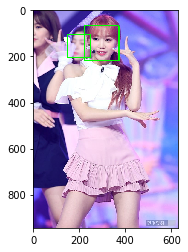

./predictImage/chaewon (4).jpg : 김채원
------------------------------------------------------------
./predictImage/chaewon (5).jpg : Fail to find face
------------------------------------------------------------


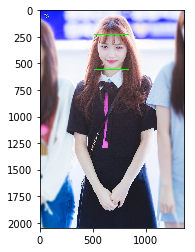

./predictImage/chaewon (7).jpg : 김채원
------------------------------------------------------------
./predictImage/chaewon (8).jpg : Fail to find face
------------------------------------------------------------


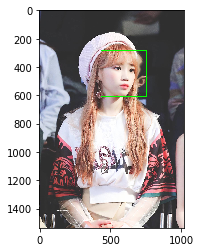

./predictImage/chaewon (9).jpg : 김채원
------------------------------------------------------------
./predictImage/yaena (1).jpg : Fail to find face
------------------------------------------------------------


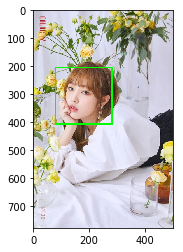

./predictImage/yaena (10).jpg : 조유리
------------------------------------------------------------


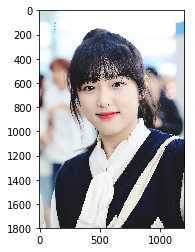

./predictImage/yaena (11).jpg : 최예나
------------------------------------------------------------
./predictImage/yaena (12).jpg : Fail to find face
------------------------------------------------------------
./predictImage/yaena (13).jpg : Fail to find face
------------------------------------------------------------


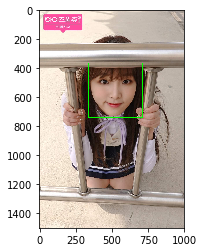

./predictImage/yaena (15).jpg : 김채원
------------------------------------------------------------
./predictImage/yaena (16).jpg : Fail to find face
------------------------------------------------------------
./predictImage/yaena (17).jpg : Fail to find face
------------------------------------------------------------
./predictImage/yaena (19).jpg : Fail to find face
------------------------------------------------------------
./predictImage/yaena (2).jpg : Fail to find face
------------------------------------------------------------


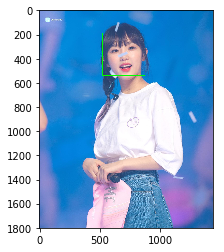

./predictImage/yaena (20).jpg : 최예나
------------------------------------------------------------


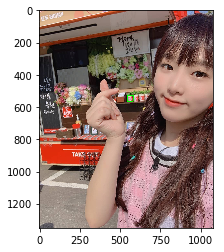

./predictImage/yaena (21).jpg : 김채원
------------------------------------------------------------


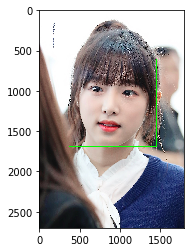

./predictImage/yaena (3).jpg : 최예나
------------------------------------------------------------
./predictImage/yaena (4).jpg : Fail to find face
------------------------------------------------------------
./predictImage/yaena (5).jpg : Fail to find face
------------------------------------------------------------


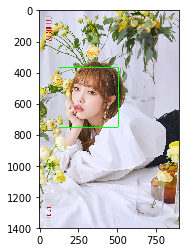

./predictImage/yaena (6).jpg : 조유리
------------------------------------------------------------


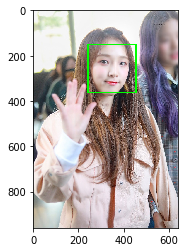

./predictImage/yaena (69).jpg : 최예나
------------------------------------------------------------
./predictImage/yaena (7).jpg : Fail to find face
------------------------------------------------------------
./predictImage/yaena (70).jpg : Fail to find face
------------------------------------------------------------
./predictImage/yaena (71).jpg : Fail to find face
------------------------------------------------------------


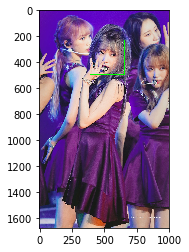

./predictImage/yaena (72).jpg : 최예나
------------------------------------------------------------


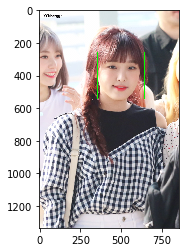

./predictImage/yaena (73).jpg : 조유리
------------------------------------------------------------
./predictImage/yaena (8).jpg : Fail to find face
------------------------------------------------------------


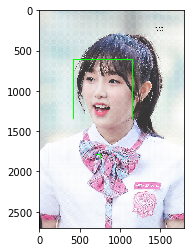

./predictImage/yaena (9).jpg : 최예나
------------------------------------------------------------
./predictImage/yuri (189).jpg : Fail to find face
------------------------------------------------------------


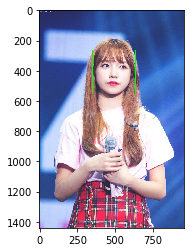

./predictImage/yuri (190).jpg : 조유리
------------------------------------------------------------


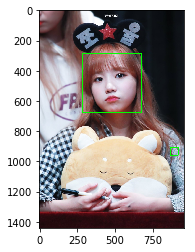

./predictImage/yuri (191).jpg : 조유리
------------------------------------------------------------


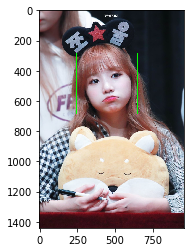

./predictImage/yuri (192).jpg : 조유리
------------------------------------------------------------


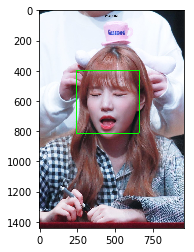

./predictImage/yuri (193).jpg : 조유리
------------------------------------------------------------


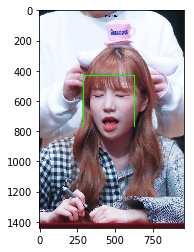

./predictImage/yuri (195).jpg : 조유리
------------------------------------------------------------


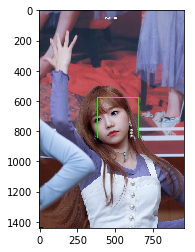

./predictImage/yuri (196).jpg : 김채원
------------------------------------------------------------


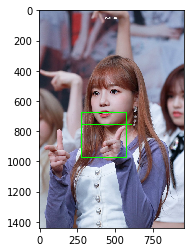

./predictImage/yuri (197).jpg : 조유리
------------------------------------------------------------


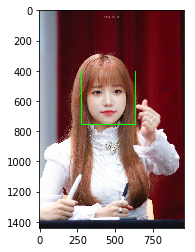

./predictImage/yuri (199).jpg : 조유리
------------------------------------------------------------


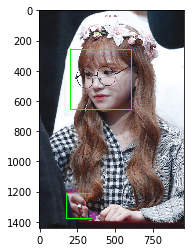

./predictImage/yuri (200).jpg : 조유리
------------------------------------------------------------


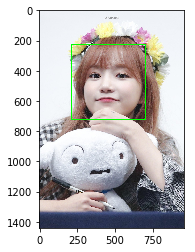

./predictImage/yuri (201).jpg : 조유리
------------------------------------------------------------


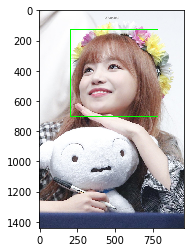

./predictImage/yuri (202).jpg : 김채원
------------------------------------------------------------
./predictImage/yuri (203).jpg : Fail to find face
------------------------------------------------------------
./predictImage/yuri (204).jpg : Fail to find face
------------------------------------------------------------
./predictImage/yuri (205).jpg : Fail to find face
------------------------------------------------------------
./predictImage/yuri (206).jpg : Fail to find face
------------------------------------------------------------


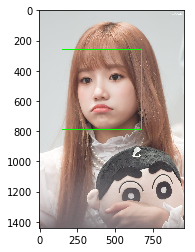

./predictImage/yuri (207).jpg : 조유리
------------------------------------------------------------


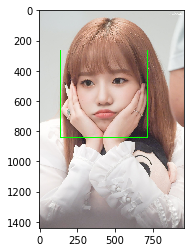

./predictImage/yuri (208).jpg : 조유리
------------------------------------------------------------
./predictImage/yuri (209).jpg : Fail to find face
------------------------------------------------------------


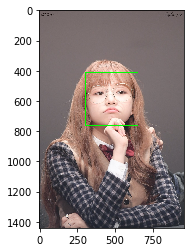

./predictImage/yuri (210).jpg : 조유리
------------------------------------------------------------


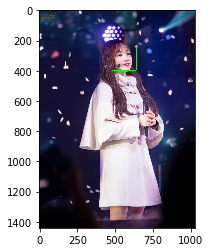

./predictImage/yuri (211).jpg : 조유리
------------------------------------------------------------


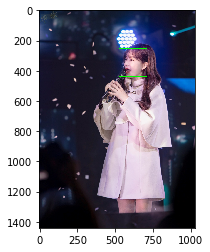

./predictImage/yuri (212).jpg : 조유리
------------------------------------------------------------
./predictImage/yuri (213).jpg : Fail to find face
------------------------------------------------------------


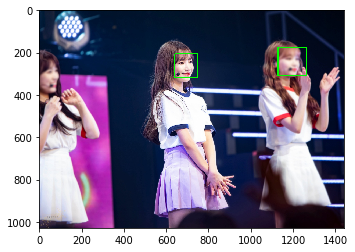

./predictImage/yuri (214).jpg : 조유리
------------------------------------------------------------
./predictImage/yuri (215).jpg : Fail to find face
------------------------------------------------------------


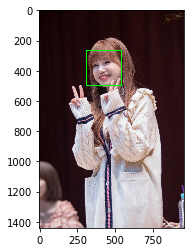

./predictImage/yuri (216).jpg : 조유리
------------------------------------------------------------
./predictImage/yuri (217).jpg : Fail to find face
------------------------------------------------------------
./predictImage/yuri (218).jpg : Fail to find face
------------------------------------------------------------


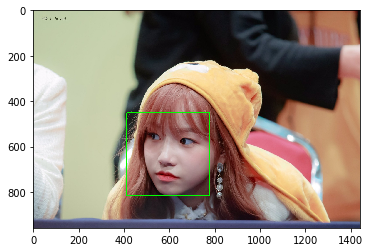

./predictImage/yuri (219).jpg : 조유리
------------------------------------------------------------


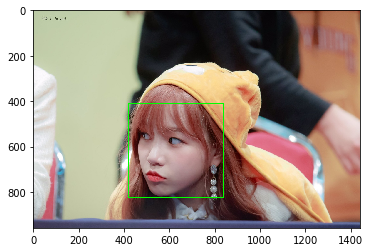

./predictImage/yuri (220).jpg : 김채원
------------------------------------------------------------
./predictImage/yuri (221).jpg : Fail to find face
------------------------------------------------------------


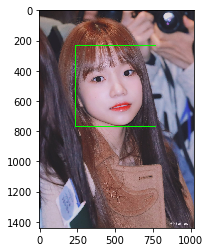

./predictImage/yuri (224).jpg : 조유리
------------------------------------------------------------


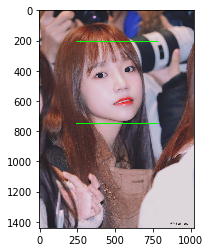

./predictImage/yuri (227).jpg : 조유리
------------------------------------------------------------


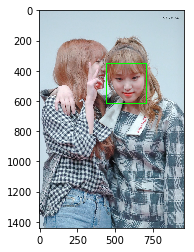

./predictImage/yuri (228).jpg : 조유리
------------------------------------------------------------


In [6]:
predictPath = './predictImage/'
imageList = os.listdir(predictPath)
predictList = ['김채원', '최예나', '조유리']
for predictImage in imageList:
    if predictImage.strip().split('.')[-1] != 'jpg':
        continue
        
    img = cv2.imread(predictPath+predictImage)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    frontFaces = frontFaceCascade.detectMultiScale(gray, 1.3, 5)
    profileFaces = profileFaceCascade.detectMultiScale(gray, 1.3, 5)
    if len(frontFaces) > 0:
        faces = frontFaces
    elif len(profileFaces) > 0:
        faces = profileFaces
    else:
        print(predictPath+predictImage+" : Fail to find face")
        print('------------------------------------------------------------')
        continue
    x, y, w, h = faces[0]
    crop  = img[y:y+h, x:x+w]
    faceImage = cv2.resize(crop, (128, 128),interpolation = cv2.INTER_CUBIC)
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 4)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()
    x = image.img_to_array(cv2.cvtColor(faceImage, cv2.COLOR_BGR2RGB))
    x = np.expand_dims(x, axis=0)
    #images = np.vstack([x])
    classes = model.predict_classes(x)
    print(predictPath+predictImage+" : " +predictList[classes[0]])
    print('------------------------------------------------------------')